In [1]:
# Import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas_profiling as pp
import pyarrow
import warnings
warnings.filterwarnings("ignore")
random_state = np.random.seed(1201) # Initialize global random state

In [2]:
# Import data
df = pd.read_parquet('PyLadies.parquet')

In [3]:
# Initial Data Analysis
df.describe()

,pax,dtd,fare,miles,target,carry
count,1.237162e+06,1.237162e+06,1.237162e+06,1.237162e+06,1.237162e+06,1.237162e+06
mean,1.434018e+00,2.311526e+01,1.037020e+02,1.116061e+03,4.593440e-01,1.655887e-01
std,7.427938e-01,2.076833e+01,7.887329e+01,5.387547e+02,4.983446e-01,3.717111e-01
min,1.000000e+00,1.000000e+00,-1.683160e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,8.000000e+00,4.699000e+01,7.330000e+02,0.000000e+00,0.000000e+00
50%,1.000000e+00,1.700000e+01,8.198000e+01,1.005000e+03,0.000000e+00,0.000000e+00
75%,2.000000e+00,3.200000e+01,1.359900e+02,1.391000e+03,1.000000e+00,0.000000e+00
max,4.000000e+00,1.000000e+02,4.681200e+02,2.817000e+03,1.000000e+00,1.000000e+00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1237162 entries, 10 to 1400536
Data columns (total 6 columns):
pax       1237162 non-null int64
dtd       1237162 non-null int64
fare      1237162 non-null float64
miles     1237162 non-null float64
target    1237162 non-null int64
carry     1237162 non-null int64
dtypes: float64(2), int64(4)
memory usage: 66.1 MB


In [5]:
# Exploratory Data Analysis
pp.ProfileReport(df)

Number of variables,7
Number of observations,1237162
Total Missing (%),0.0%
Total size in memory,66.1 MiB
Average record size in memory,56.0 B
Numeric,5
Categorical,0
Boolean,2
Date,0
Text (Unique),0
Rejected,0


In [6]:
# Pre-Processing
X = df.drop(columns={'target'})
y = df['target']

In [8]:
# Split dataset into training and testing 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=66)
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

X_train: (866013, 5)
X_test: (371149, 5)
y_train: (866013,)
y_test: (371149,)


In [14]:
# Instantiate Random Forest Classifier object
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(X_train, y_train)
RandomForestClassifier(bootstrap=True, class_weight=None,
            max_depth=None, max_features='auto',min_samples_split=2, 
                n_estimators=10, n_jobs=2,random_state=random_state)

# Test model
y_pred = clf.predict(X_test)

In [15]:
# Evaluation
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.6107277670154035


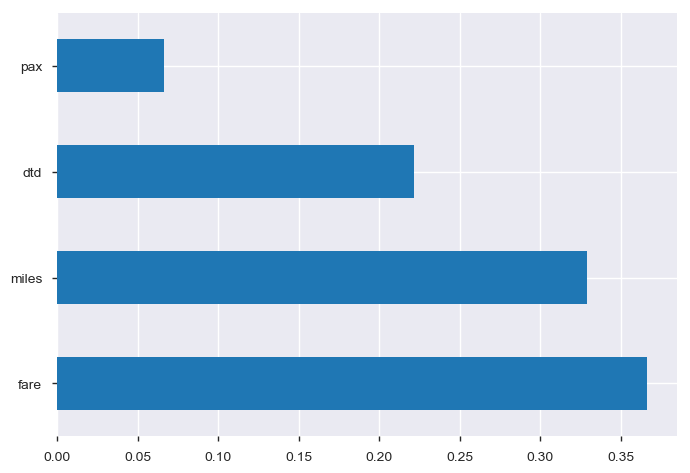

In [21]:
# Features of importance
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(4).plot(kind='barh')